<a href="https://colab.research.google.com/github/JakeOh/202205_itw_bd34/blob/main/da05_seaborn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 필요한 라이브러리 import

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 셋

In [2]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


# Box Plot

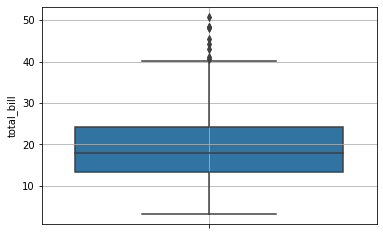

In [3]:
sns.boxplot(y='total_bill', data=tips)
plt.grid()
plt.show()

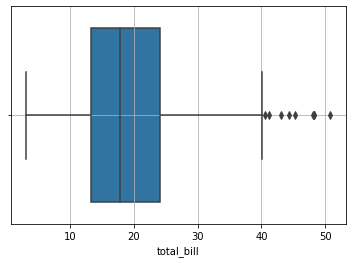

In [4]:
sns.boxplot(x='total_bill', data=tips)
plt.grid()
plt.show()

성별 tip의 box plot

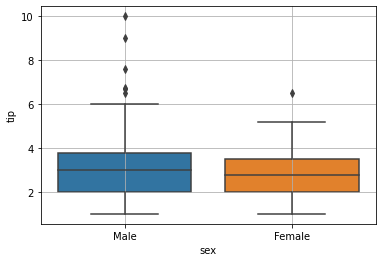

In [5]:
sns.boxplot(x='sex', y='tip', data=tips)
plt.grid()
plt.show()

In [6]:
tips[tips.sex == 'Male'].tip.describe()

count    157.000000
mean       3.089618
std        1.489102
min        1.000000
25%        2.000000
50%        3.000000
75%        3.760000
max       10.000000
Name: tip, dtype: float64

In [7]:
tips[tips.sex == 'Female'].tip.describe()

count    87.000000
mean      2.833448
std       1.159495
min       1.000000
25%       2.000000
50%       2.750000
75%       3.500000
max       6.500000
Name: tip, dtype: float64

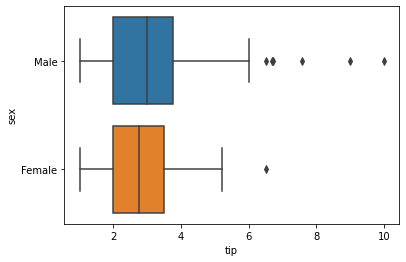

In [8]:
sns.boxplot(x='tip', y='sex', data=tips)
plt.show()

요일별 tip의 box plot

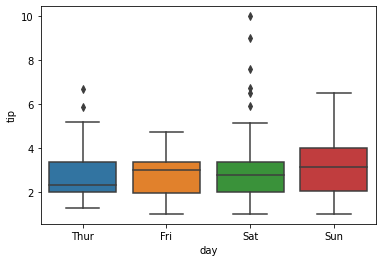

In [9]:
sns.boxplot(x='day', y='tip', data=tips)
plt.show()

Subplot을 생성해서 각각 그래프 그리기

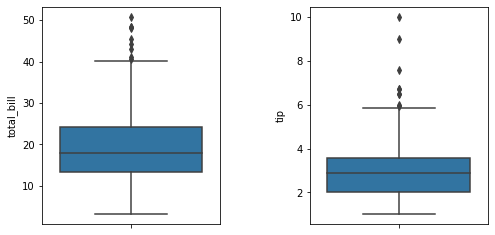

In [10]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))

sns.boxplot(y='total_bill', data=tips, ax=ax[0])
sns.boxplot(y='tip', data=tips, ax=ax[1])

plt.subplots_adjust(wspace=0.5)
plt.show()

2개의 Subplot에 흡연여부별 tip, 시간별 tip의 box plot

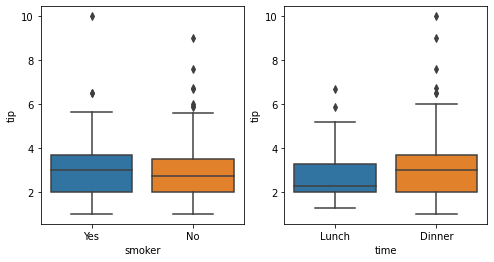

In [13]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))

sns.boxplot(x='smoker', y='tip', data=tips, ax=ax[0])
sns.boxplot(x='time', y='tip', data=tips, ax=ax[1])

plt.show()